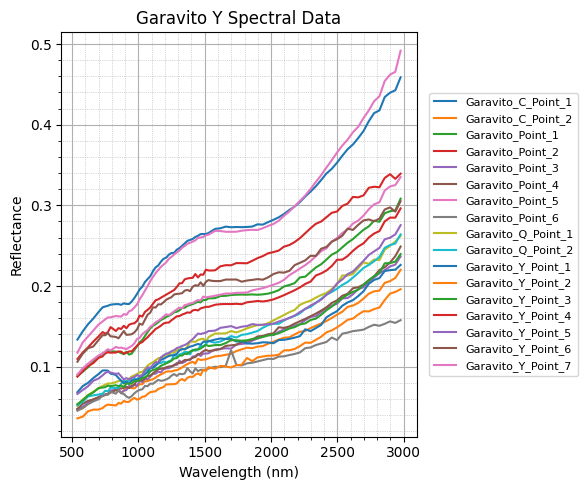

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Path to the folder containing spectral data
spectra_folder = r"D:\Tesis_GIS_Luna\Luna\M3\Reflectance  L2\20250213T180654006119\Spectrum_data\All_spectra"
files = glob.glob(os.path.join(spectra_folder, "*.txt"))

plt.figure(figsize=(6, 5))  # un poco más ancho para dar espacio a la leyenda

for file in files:
    try:
        # Cargar datos omitiendo cabecera
        data = np.loadtxt(file, skiprows=4)

        if data.shape[1] < 2:
            print(f"{file} tiene menos de 2 columnas, se omite.")
            continue

        wavelength = data[:, 0]
        reflectance1 = data[:, 1]
        name = os.path.basename(file).replace(".txt", "")

        plotted = False

        # Si hay 3 columnas, elegir la que tenga datos válidos
        if data.shape[1] >= 3:
            reflectance2 = data[:, 2]
            mask1 = reflectance1 > 0
            mask2 = reflectance2 > 0

            if np.any(mask1):
                plt.plot(wavelength[mask1], reflectance1[mask1], label=f"{name}")
                plotted = True
            elif np.any(mask2):
                plt.plot(wavelength[mask2], reflectance2[mask2], label=f"{name}")
                plotted = True

        else:
            mask1 = reflectance1 > 0
            if np.any(mask1):
                plt.plot(wavelength[mask1], reflectance1[mask1], label=f"{name}")
                plotted = True

        if not plotted:
            print(f"{file} no tiene datos válidos.")

    except Exception as e:
        print(f"Error leyendo {file}: {e}")

# Ejes, título y rejilla
plt.minorticks_on()
plt.grid(True, which="major", linestyle="-", linewidth=0.8)
plt.grid(True, which="minor", linestyle=":", linewidth=0.5)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Garavito Y Spectral Data")

# Leyenda fuera del área del gráfico
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=8)

plt.tight_layout()
plt.show()

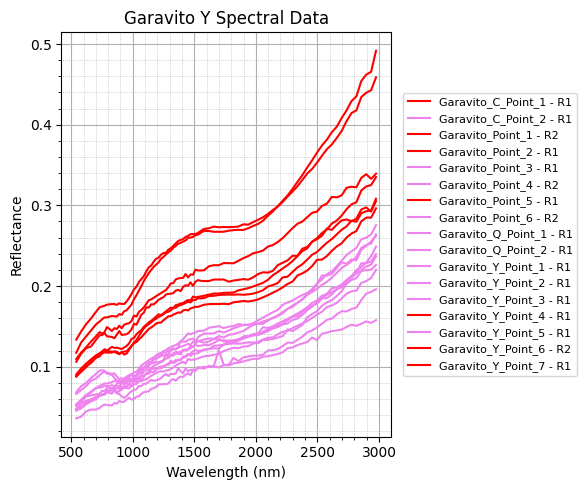

In [3]:
# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Ruta a la carpeta con los espectros
spectra_folder = r"D:\Tesis_GIS_Luna\Luna\M3\Reflectance  L2\20250213T180654006119\Spectrum_data\All_spectra"
files = glob.glob(os.path.join(spectra_folder, "*.txt"))

plt.figure(figsize=(6, 5))

for file in files:
    try:
        data = np.loadtxt(file, skiprows=4)

        if data.shape[1] < 2:
            print(f"{file} tiene menos de 2 columnas, se omite.")
            continue

        wavelength = data[:, 0]
        reflectance = None
        label_suffix = ""

        # Usar reflectancia1 si tiene datos válidos
        reflectance1 = data[:, 1]
        mask1 = reflectance1 > 0
        if np.any(mask1):
            reflectance = reflectance1
            mask = mask1
            label_suffix = "R1"

        # Si reflectancia1 no es válida, intentar con reflectancia2
        elif data.shape[1] >= 3:
            reflectance2 = data[:, 2]
            mask2 = reflectance2 > 0
            if np.any(mask2):
                reflectance = reflectance2
                mask = mask2
                label_suffix = "R2"

        # Si no hay datos válidos, omitir archivo
        if reflectance is None:
            continue

        # Evaluar reflectancia media
        mean_reflectance = np.mean(reflectance[mask])
        color = "red" if mean_reflectance > 0.15 else "violet"

        name = os.path.basename(file).replace(".txt", "")
        plt.plot(
            wavelength[mask],
            reflectance[mask],
            label=f"{name} - {label_suffix}",
            color=color,
        )

    except Exception as e:
        print(f"Error leyendo {file}: {e}")

# Estética del gráfico
plt.minorticks_on()
plt.grid(True, which="major", linestyle="-", linewidth=0.8)
plt.grid(True, which="minor", linestyle=":", linewidth=0.5)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Garavito Y Spectral Data")

# Leyenda fuera del gráfico
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=8)
plt.tight_layout()
plt.show()